## Aperçu
Je vous propose d'utiliser le nettoyage, les recommandations, l'implication, l'analyse et la visualisation des données pour générer des informations à destination d'une partie prenante de l'entreprise.

In [113]:
# Lire le fichier CSV dans un DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Chargement du fichier
    

In [114]:
# Utilisation de l'encodage "ISO-8859-1" pour éviter les erreurs de décodage liées à des caractères spéciaux ou non-UTF-8.
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', low_memory=False)

## Dataset Aviation
Le data dossier contient un du National Transportation Safety Board qui comprend des données sur les accidents d'aviation de 1962 à 2023 concernant les accidents de l'aviation civile et des incidents sélectionnés aux États-Unis et dans les eaux internationales.

In [115]:
# Le dataset "Aviation" provient du National Transportation Safety Board (NTSB) et couvre les accidents d'aviation civile.
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Nettoyage des données


In [116]:
# Nettoyage des noms de colonnes : 
# Suppresion des des espaces inutiles autour des noms de colonnes.
# Conversion des noms de colonnes en minuscules pour uniformiser.
# Remplacement des points (".") par des underscores ("_") pour des éviter des problèmes lors de l'accès aux colonnes.
df.columns = [col.strip().lower().replace(".","_") for col in df.columns]
df

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [117]:
# Nettoyage des données
## Suppression des colonnes inutiles
cols_to_drop = ['investigation_type', 'latitude', 'longitude', 'airport_code', 'airport_name',
                'far_description', 'event_id', 'publication_date']
df1 = df.drop(columns=cols_to_drop)
df1

,accident_number,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,...,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,...,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,CESSNA,210N,...,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN


## Analyse Exploratoire des données (EDA)
Nombre d'accident par année

Nous avons ensuite regardé combien d'accidents ont eu lieu chaque année.

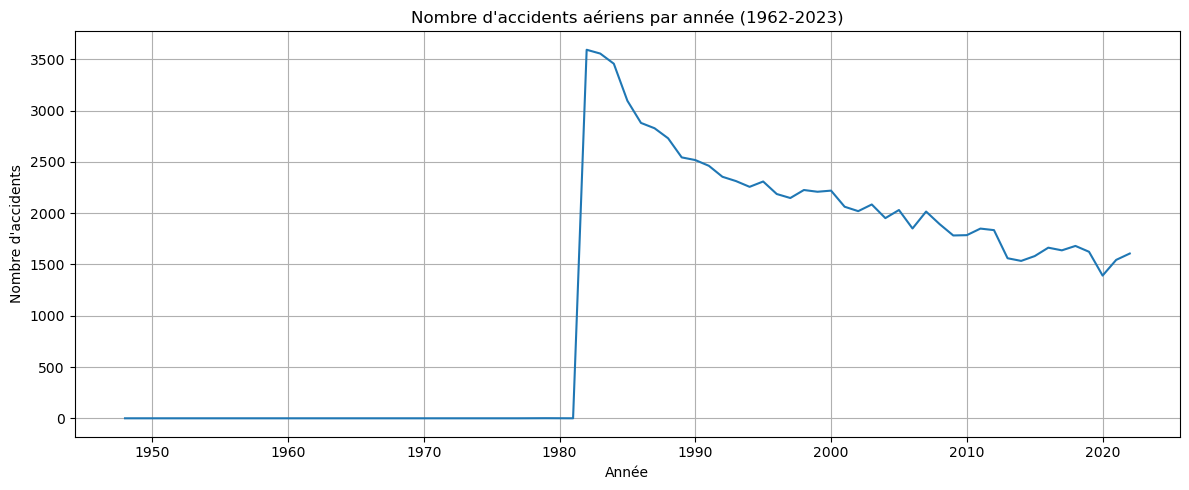

In [118]:
# Conversion des dates en format datetime si ce n'est pas déjà fait
df1['event_date'] = pd.to_datetime(df1['event_date'], errors='coerce')

# Extraction de l'année
df1['year'] = df1['event_date'].dt.year

# Comptage des accidents par an
accidents_by_year = df1.groupby('year').size()

# Affichage du graphique
plt.figure(figsize=(12, 5))
accidents_by_year.plot()
plt.title("Nombre d'accidents aériens par année (1962-2023)")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.tight_layout()
plt.show()


Type de dommages les plus fréquents

Nous avons analysé la colonne aircraft_damage, qui indique le type de dommage subi par l’avion.

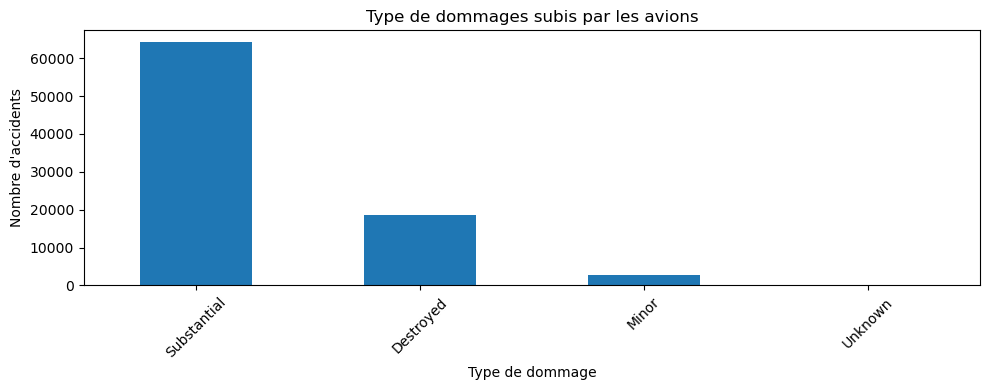

In [119]:
# Affichage du type de dommage les plus fréquents subis par les avions
plt.figure(figsize=(10, 4))
df1['aircraft_damage'].value_counts().plot(kind='bar')
plt.title("Type de dommages subis par les avions")
plt.xlabel("Type de dommage")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

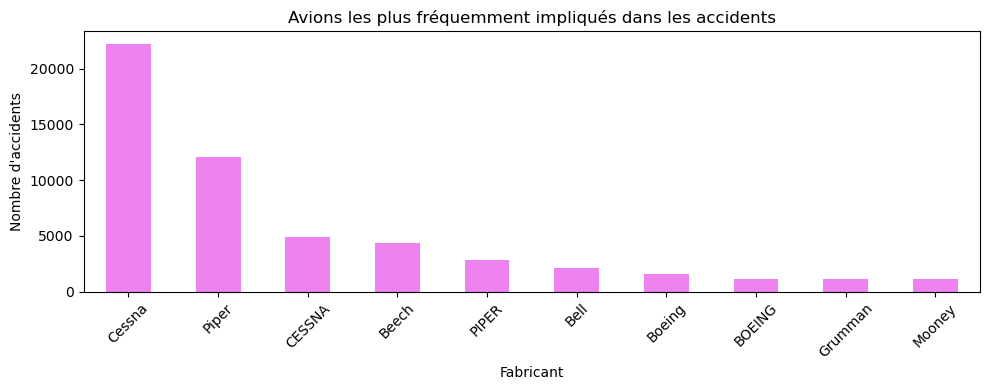

In [120]:
# Analyse des avion les plus impliqués
most_common_aircraft = df1['make'].value_counts().head(10)
plt.figure(figsize=(10, 4))
most_common_aircraft.plot(kind='bar', color='violet')
plt.title("Avions les plus fréquemment impliqués dans les accidents")
plt.xlabel("Fabricant")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
# Recommandation
# On considère que les avions avec moins d'accidents et peu de dommages sont à prioriser
safe_aircrafts = df1[df1['aircraft_damage'].str.lower() == 'minor']
recommended_models = safe_aircrafts['make'].value_counts().head(5)
print("Modèles d'avion recommandés (dommages mineurs uniquement) :")
print(recommended_models)
safe_aircrafts

Modèles d'avion recommandés (dommages mineurs uniquement) :
make
Boeing               429
Cessna               312
BOEING               282
Piper                165
Mcdonnell Douglas    143
Name: count, dtype: int64


,accident_number,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,year
23,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,Incident,Minor,Airplane,N5018P,Piper,PA-24-180,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,1982
40,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,Incident,Minor,Airplane,N5782N,Rockwell,114,...,Business,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,1982
80,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,Incident,Minor,Airplane,N615KC,Embraer,EMB-110P1,...,Unknown,Aeromech Incorporated,0.0,0.0,0.0,2.0,VMC,Taxi,Probable Cause,1982
119,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,Incident,Minor,Airplane,N9240N,De Havilland,DHC-6-300,...,Ferry,NaN,0.0,0.0,0.0,1.0,IMC,Descent,Probable Cause,1982
131,LAX82IA044,1982-01-20,"SAN JOSE, CA",United States,Incident,Minor,Airplane,N74HP,Piper,PA-31-350,...,Executive/corporate,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88643,CEN23LA006,2022-10-07,"Albuquerque, NM",United States,Serious,Minor,Balloon,N9140F,AEROSTAR INTERNATIONAL,S53A,...,Personal,Steven C. Derebey,0.0,1.0,1.0,1.0,NaN,NaN,NaN,2022
88665,DCA23WA019,2022-10-14,"Keflavík,",Iceland,NaN,Minor,Airplane,N823AN,BOEING,787-9,...,NaN,AMERICAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022
88725,ERA23LA043,2022-10-27,"Roberta, GA",United States,Non-Fatal,Minor,Airplane,N4349R,CESSNA,172M,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,NaN,NaN,2022
88729,ENG23WA003,2022-10-27,"Nanjing Lukou International Airport,",China,NaN,Minor,Airplane,N899ST,BOMBARDIER INC,BD-700-2A12,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022


## Trois Recommandations Commerciales

### Optimisation de la Sélection des Modèles d'avion

Se concentrer sur les modèles avec un nombre inférieur d'accidents graves et une fréquence plus élevée de dommages mineurs.

### Amélioration de la Formation des Pilotes et des Opérations

Réorienter la formation des pilotes en se basant sur des tendances observées dans les accidents récurrents.


### Amélioration de la Maitenance Préventive

Développer une stratégie de maintenance spécifique aux modèles d'avion les plus impliqués dans les accidents pour identifier les points de faiblesse dans la conception ou l'entretien.


## En résumé du projet : 
## Analyse des accidents d'aviation 

Ce projet consiste à analyser un dataset provenant du National Transportation Safety Board (NTSB), qui couvre les accidents d'aviation civile survenus entre 1962 et 2023. Ce jeu de données inclut des informations détaillées sur les accidents aériens aux États-Unis et dans les eaux internationales, notamment les types d'accidents, les causes, les types de dommages subis par les avions, ainsi que les fabricants d'avions impliqués.